In [106]:
#Importiamo i pacchetti necessari
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit

Prima di tutto, è necessario introdurre un programma che sia in grado di simulare la traiettoria che viene compiuta nello spazio delle fasi. Riportiamo in seguito quanto fatto.


[0.94, 0.94, 0.20000000000000015, 0.20000000000000015, 0.20000000000000015, 0.2857142857142859, 0.2857142857142859, 0.2857142857142859, 0.4081632653061228, 0.4081632653061228, 0.4081632653061228, 0.5830903790087468, 0.5830903790087468, 0.5830903790087468, 0.8329862557267812]


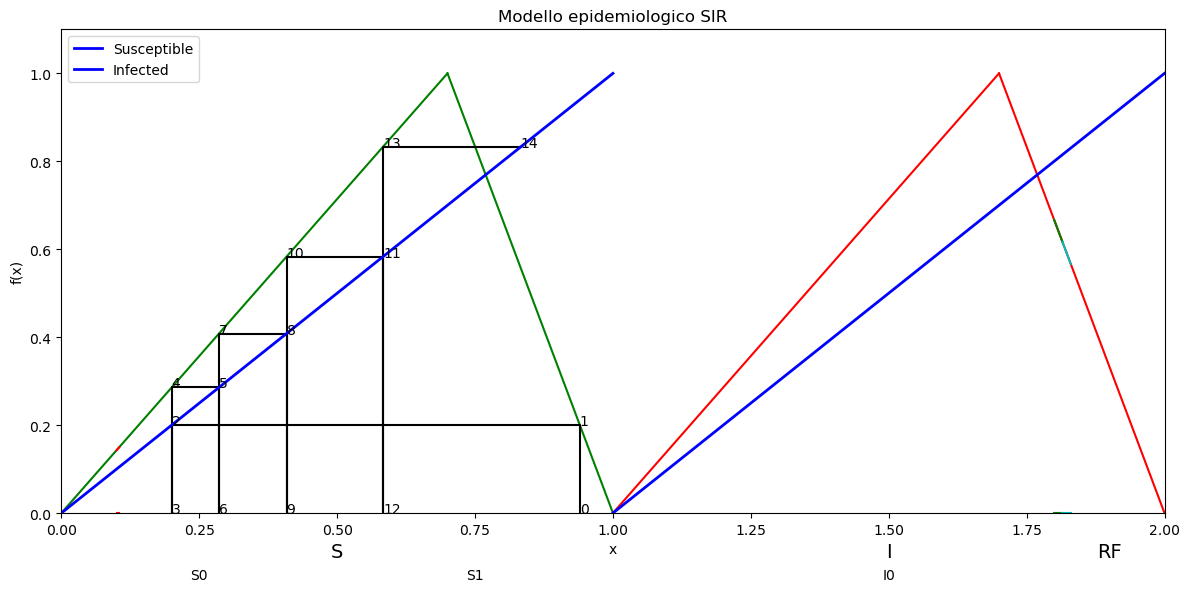

In [107]:
#definiamo prima di tutto la funzione che definisce il nostro sviluppo
def f(x, r):
    if x <= r:
        return x / r
    elif x>r and x<1:
        return (1 - x) / (1 - r)
    elif x <= 1 + r and x >= 1:
        return (x-1) / r
    else :
        return (2 - x) / (1 - r)

#a questo punto, determiniamo alcuni parametri utili
z_S = np.linspace(0,1)
y_S = z_S

z_I = np.linspace(1,2)
y_I = z_S

x_test = 0.94 #condizione iniziale della nostra simulazione
x_triangle = []#array contenente i vari step evolutivi
y_triangle = []#coordinata lungo l'asse y

#Intervallo S0,R0,I0, determinato in base a quanto riportato sul paper
S0_min , S0_max  = 0.1 , 0.105
R_min , R_max = 1.8, 1.815
F_min , F_max = 1.815, 1.83
r=0.7
steps = 5 #determiniamo quanti steps, o intervalli temporali, lasciamo trascorrere

# TRAIETTORIA CON ITERAZIONI

for i in range(steps):
    x_triangle.append(x_test)
    y_triangle.append(0)
    x_triangle.append(x_test)
    if x_test <=1:
        if x_test >= S0_min and x_test <= S0_max:
            x_test = f(x_test +1,r)
            y_triangle.append(x_test)
            x_triangle.append(x_test+1)
            y_triangle.append(x_test)
            x_test = x_test +1
        else:
            x_test = f(x_test,r)
            y_triangle.append(x_test)
            x_triangle.append(x_test)
            y_triangle.append(x_test)
    else:
        if x_test >= R_min and x_test <= R_max:
            x_test = f(x_test -1,r)
            y_triangle.append(x_test)
            x_triangle.append(x_test)
            y_triangle.append(x_test)
        elif x_test > F_min and x_test <= F_max:
            x_test = f(x_test -1,r) 
            y_triangle.append(x_test)
            x_triangle.append(x_test)
            y_triangle.append(x_test)
        else:
            x_test = f(x_test,r)
            y_triangle.append(x_test)
            x_triangle.append(x_test+1)
            y_triangle.append(x_test) 
            x_test = x_test+1
       
#verifichiamo che quanto fatto sia corretto graficando l'andamento complessivo:

fig, ax = plt.subplots(figsize=(12, 6))

# Plotto la funzione
x1 = np.linspace(0,r)
y1 = x1/r

x2 = np.linspace(r,1)
y2 = (1-x2)/(1-r)

x3 = np.linspace(1,r+1)
y3 = (x3-1)/r

x4 = np.linspace(1+r,2)
y4 = (2-x4)/(1-r)

ax.plot(x1,y1, color = 'g')
ax.plot(x2,y2, color = 'g')
ax.plot(x3,y3, color = 'r')
ax.plot(x4,y4, color = 'r')
ax.plot(x_triangle,y_triangle, 'k')
for i in range(len(x_triangle)):
    ax.annotate(i, (x_triangle[i], y_triangle[i]))


#Plotto Intervalli

x_intervallo_S0 = np.linspace(S0_min, S0_max)
y_inervallo_S0 = []
for i in x_intervallo_S0:
    yy = f(i,r)
    y_inervallo_S0.append(yy)
y_0000 = np.zeros(len(x_intervallo_S0))
ax.plot(x_intervallo_S0,y_0000,'r')
ax.plot(x_intervallo_S0,y_inervallo_S0, 'r')

x_intervallo_R = np.linspace(R_min, R_max)
y_inervallo_R = []
for i in x_intervallo_R:
    yy = f(i-1,r)
    y_inervallo_R.append(yy)
y_0000 = np.zeros(len(x_intervallo_R))
ax.plot(x_intervallo_R,y_0000,'g')
ax.plot(x_intervallo_R,y_inervallo_R, 'g')

x_intervallo_F = np.linspace(F_min, F_max)
y_inervallo_F = []
for i in x_intervallo_F:
    yy = f(i-1,r)
    y_inervallo_F.append(yy)
y_0000 = np.zeros(len(x_intervallo_F))
ax.plot(x_intervallo_F,y_0000,'c')
ax.plot(x_intervallo_F,y_inervallo_F, 'c')

# Plotta le curve
ax.plot(z_S, y_S, 'b-', linewidth=2, label='Susceptible')
ax.plot(z_I, y_I, 'b-', linewidth=2, label='Infected')


# Etichette delle sezioni
ax.text(0.5, -0.1, 'S', ha='center', fontsize=14)
ax.text(1.5, -0.1, 'I', ha='center', fontsize=14)
ax.text(1.9, -0.1, 'RF', ha='center', fontsize=14)

# Etichette S0, S1, I0
ax.text(0.25, -0.15, 'S0', ha='center')
ax.text(0.75, -0.15, 'S1', ha='center')
ax.text(1.5, -0.15, 'I0', ha='center')

# Impostazioni del grafico
ax.set_xlim(0, 2)
ax.set_ylim(0, 1.1)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Modello epidemiologico SIR')
ax.legend()
print(x_triangle)
plt.tight_layout()
plt.show()
        

Un approccio spesso utilizzato nella descrizione dell'evoluzione di una pandemia è quello ispirato alle teorie di Bernulli e Kermack-McKendrick. In questo caso, i termini S,I,$S_0$,R,F faranno riferimento alla frazione della popolazione totale che si trova in quella specifica categoria. La transizione tra le varie categorie si verifica in maniera stocastica. Possiamo definire ad ogni step una frazione $\alpha$, che esprime quanti di S diventano malati a causa di fattori ESTERNI, una frazione di persone infette che guariscono con $\beta$ e, più avanti, terremo conto anche del termine di accoppiamento $\gamma$I di S, cioè coloro che, da suscettibili, si ammalano a causa delle interazioni con il proprio ${network}$

## Dinamica individuale
L'equazione differenziale che descriverà l'andamento di una dinamica individuale è la seguente
$$ \frac{d}{dt}S=-\alpha S+\beta I $$
Tenendo conto del fatto che $S+I=1$, si può riscrivere nella seguente forma di equazione differenziale:
$$ \frac{d}{dt}S=-(\alpha+\beta) S+\beta $$
L'equazione ottenuta è una banale equazione differenziale al primo ordine che ha come risultato:
$$ S(t)=C e^{-(\alpha+\beta)t}+\frac{\beta}{\alpha+\beta}$$
é evidente come la soluzione ottenuta presenti un valore asintotico a $I_\infty=\frac{\beta}{\alpha+\beta} $ con un rate di convergenza $\phi=\alpha+\beta$


## Dinamica di network 
Nel caso in cui si vuole tener conto del termine di accoppiamento, bisognerà risolvere il seguente sistema di equazioni differenziali:
$$ \frac{d}{dt}S=-\alpha S+\beta I -\gamma IS $$
$$\frac{d}{dt}I=-\frac{d}{dt}S $$
Applicando sempre la stessa sostituzione per cui $$I+S=1$$, si ottiene che:
$$\frac{d}{dt}I=\alpha -(\alpha +\beta-\gamma)I-\gamma I^2 \equiv g(I)$$
Se volessimo però risolvere questo problema con RK, sarebbe prima di tutto necessario conoscere i parametri $\alpha,\beta,\gamma$ della nostra funzione... Come possiamo fare?


Sfruttiamo proprio il simulatore di traiettoria che abbiamo codificato.


In [108]:
# Parametri del modello
M = 100000  # Numero di individui
N = 500 # Numero di passi temporali
r = 0.7  # Parametro del modello
oo=10

S0_min , S0_max = 0.1 , 0.105
R_min , R_max = 1.8 , 1.815
F_min , F_max = 1.815 , 1.830

# Inizializzazione delle condizioni iniziali
x = np.random.uniform(0, 1, M)
y = np.zeros(M)

# Inizializzazione delle frazioni
S = np.zeros(N+1)# lista con tutti i valori delle frazioni di S ai vari step
I = np.zeros(N+1)
R = np.zeros(N+1)
F = np.zeros(N+1)
RF = np.zeros(N+1)
S0 = np.zeros(N+1)
K = np.zeros(N+1)
# Impostazione delle condizioni iniziali
S[0] = 1.0
I[0] = R[0] = F[0] = 0.0

     

#Definiamo come fatto prima una funzione che mi restituisca la traiettoria:
def trajectory(x_test,steps,r):
    x_triangle = []
    y_triangle = []
    for i in range(steps):
        x_triangle.append(x_test)
        x_triangle.append(x_test)
        if x_test <=1:
            if x_test >= S0_min and x_test <= S0_max:
                x_test = f(x_test +1,r)
                x_triangle.append(x_test+1)
                x_test = x_test +1
            else:
                x_test = f(x_test,r)
                x_triangle.append(x_test)
        else:
            if x_test >= R_min and x_test <= R_max:
                x_test = f(x_test -1,r)
                x_triangle.append(x_test)
            elif x_test > F_min and x_test <= F_max:
                x_test = f(x_test -1,r) 
                x_triangle.append(x_test)
            else:
                x_test = f(x_test,r)
                x_triangle.append(x_test+1)
                x_test = x_test+1
    traiettoria=list(dict.fromkeys(x_triangle))
    traiettoria.pop()
    return traiettoria

A = []
for i in range(M):
    listatraiettoria=trajectory(x[i],N,r)
    A.append(listatraiettoria)
  
matrix=np.array(A)

for i in range(N):
    for j in range(M):
        if matrix[j,i]<1:
            S[i]=S[i]+1
        else:
            I[i]=I[i]+1
        if matrix[j,i]>S0_min and matrix[j,i]<S0_max:
            S0[i]=S0[i]+1
        elif matrix[j,i]<S0_min or (matrix[j,i]>S0_max and matrix[j,i]<1):
            S[i]=S[i]+1
        elif matrix[j,i]>R_min and matrix[j,i]<F_max:
            RF[i]=RF[i]+1
        else:
            I[i]=I[i]+1
            
#trajectory(0.94,5,0.7)

S0_normalizzata=[]
I_normalizzata=[]
RF_normalizzata=[]
F_normalizzata=[]
for x in S0:
    S0_normalizzata.append(x/M)
for z in I:
    I_normalizzata.append(z/M)
for x in RF:
   RF_normalizzata.append(x/M)
 
 
assex=np.linspace(0,N+1,N+1)
assey1=S0_normalizzata
assey2=I_normalizzata
assey3=RF_normalizzata
fig, ax = plt.subplots(figsize=(12, 6))                            
ax.scatter(assex,assey2, color = 'r')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Modello epidemiologico SIR')
ax.legend()
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

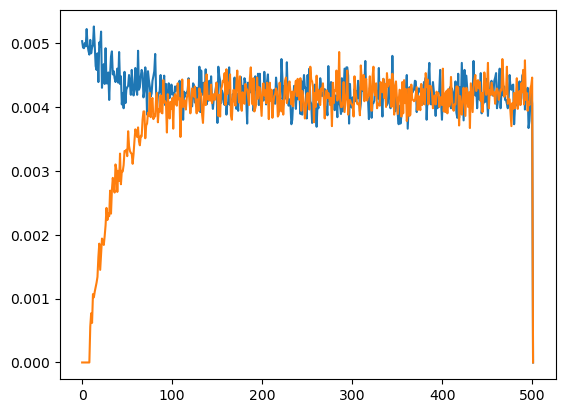

In [109]:
salva_SO = S0_normalizzata
salva_I = I_normalizzata
salva_RF = RF_normalizzata

plt.plot(assex,assey1)
plt.plot(assex,assey3)
plt.show()

Coefficiente angolare (a): 5.293028484286632e-06
Intercetta (b): 0.3448118533845435


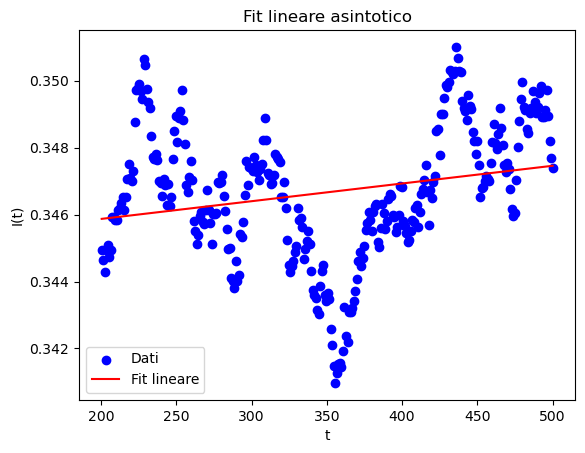

In [110]:
x_val = assex[200:-1]
y_val = assey2[200:-1]

def linear_func(x, a, b):
    return a * x + b

# Esegui il fit lineare
popt, pcov = curve_fit(linear_func, x_val, y_val)
a_fit, b_fit = popt
print(f"Coefficiente angolare (a): {a_fit}")
print(f"Intercetta (b): {b_fit}")

# Calcola i valori y usando i parametri del fit
y_fit = linear_func(x_val, *popt)

I_inf = b_fit

# Grafico dei dati originali e della linea di fit
plt.scatter(x_val, y_val, label='Dati', color='blue')
plt.plot(x_val, y_fit, label='Fit lineare', color='red')
plt.xlabel('t')
plt.ylabel('I(t)')
plt.legend()
plt.title('Fit lineare asintotico')
plt.show()


Valori ottimizzati: A = 1.1483476364264407, phi = 0.037149093107185026


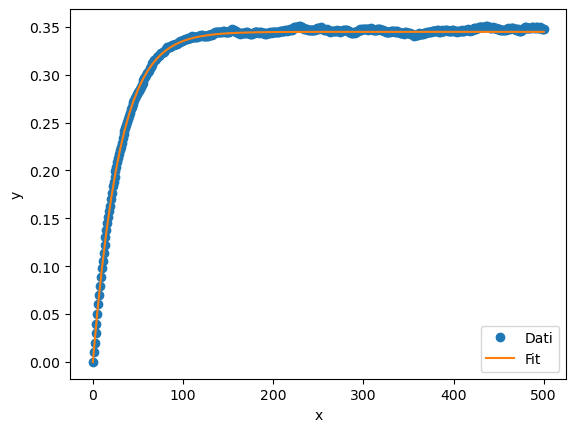

In [111]:
x_val = assex[:-1]
y_val = assey2[:-1]

def curve_func(x, A, phi):
    return - (A*I_inf)/(np.exp(phi*x) + A -1) + I_inf

# Esegui il fit
initial_guess = [1.46, 0.0265]
popt, pcov = curve_fit(curve_func, x_val, y_val)

# Parametri ottimizzati
A_opt, phi_opt = popt

# Stampa dei risultati
print(f'Valori ottimizzati: A = {A_opt}, phi = {phi_opt}')

# Traccia il risultato del fit
x_fit = np.linspace(min(x_val), max(x_val), 100)
y_fit = curve_func(x_fit, A_opt, phi_opt)

plt.plot(x_val, y_val, 'o', label='Dati')
plt.plot(x_fit, y_fit, '-', label='Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [112]:
J = I_inf/(1 -A_opt)
gamma = phi_opt/(I_inf-J)
alfa = (phi_opt-gamma*I_inf)*I_inf
beta = alfa/I_inf - (alfa - gamma) - gamma*I_inf

print('J = ' + str(J))
print('alfa = ' + str(alfa))
print('beta = ' + str(beta))
print('gamma = ' + str(gamma))

J = -2.324350166209228
alfa = 0.01115467759023334
beta = 0.030314197430097962
gamma = 0.013917886150964663


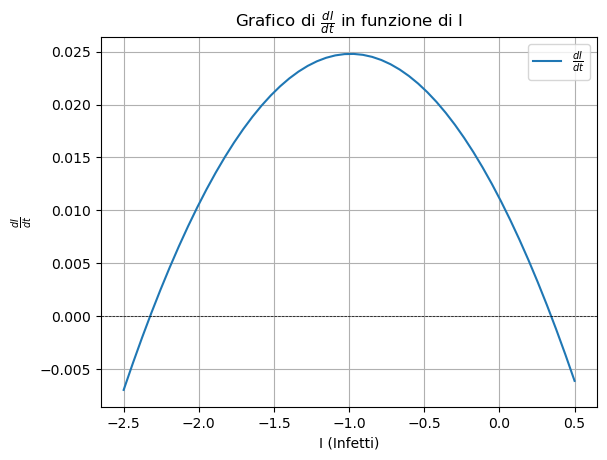

In [113]:
# Funzione per calcolare dI/dt in funzione di I
def dIdt(I, alfa, beta, gamma):
    return alfa - (alfa + beta - gamma)*I - gamma*(I**2)

# Valori di I per cui calcolare dI/dt
I_values = np.linspace(-2.5, 0.5)

# Calcolare dI/dt per ciascun valore di I assumendo S = 1 - I
dIdt_values = dIdt(I_values, alfa, beta, gamma)

# Tracciare il grafico di dI/dt in funzione di I
plt.plot(I_values, dIdt_values, label=r'$\frac{dI}{dt}$')
plt.xlabel('I (Infetti)')
plt.ylabel(r'$\frac{dI}{dt}$')
plt.title(r'Grafico di $\frac{dI}{dt}$ in funzione di I')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
#plt.ylim(-0.007,0.1)

plt.grid()
plt.show()

Coefficiente angolare (a): -0.033799835714981116
Intercetta (b): 0.011425673499775336


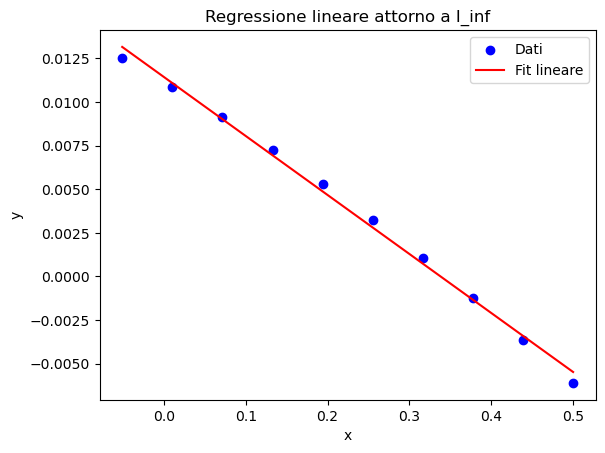

In [114]:
punti_fit = 10

dIdt_fit_values = dIdt_values[-punti_fit:]
I_fit_values = I_values[-punti_fit:]

def linear_func(x, a, b):
    return a * x + b

# Esegui il fit lineare
popt, pcov = curve_fit(linear_func, I_fit_values, dIdt_fit_values)
a_fit, b_fit = popt
print(f"Coefficiente angolare (a): {a_fit}")
print(f"Intercetta (b): {b_fit}")

# Calcola i valori y usando i parametri del fit
y_fit = linear_func(I_fit_values, *popt)

# Grafico dei dati originali e della linea di fit
plt.scatter(I_fit_values, dIdt_fit_values, label='Dati', color='blue')
plt.plot(I_fit_values, y_fit, label='Fit lineare', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Regressione lineare attorno a I_inf')
plt.show()

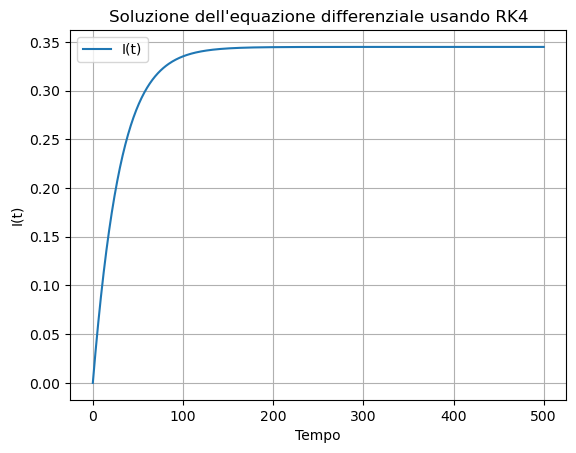

In [115]:
I0 = 0

def runge_kutta(f, I0, t0, tf, dt, alfa, beta, gamma):
    n = int((tf - t0) / dt)
    t = np.linspace(t0, tf, n)
    I = np.zeros(n)
    I[0] = I0
    
    for i in range(1, n):
        k1 = dt * f(I[i-1], alfa, beta, gamma)
        k2 = dt * f(I[i-1] + 0.5 * k1, alfa, beta, gamma)
        k3 = dt * f(I[i-1] + 0.5 * k2, alfa, beta, gamma)
        k4 = dt * f(I[i-1] + k3, alfa, beta, gamma)
        I[i] = I[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return t, I


# Parametri di tempo
t0 = 0
tf = 500
dt = 1

# Risolvere l'equazione differenziale
t, I = runge_kutta(dIdt, I0, t0, tf, dt, alfa, beta, gamma)



# Visualizzare i risultati
plt.plot(t, I, label='I(t)')
plt.xlabel('Tempo')
plt.ylabel('I(t)')
plt.title('Soluzione dell\'equazione differenziale usando RK4')
plt.legend()
plt.grid(True)
plt.show()

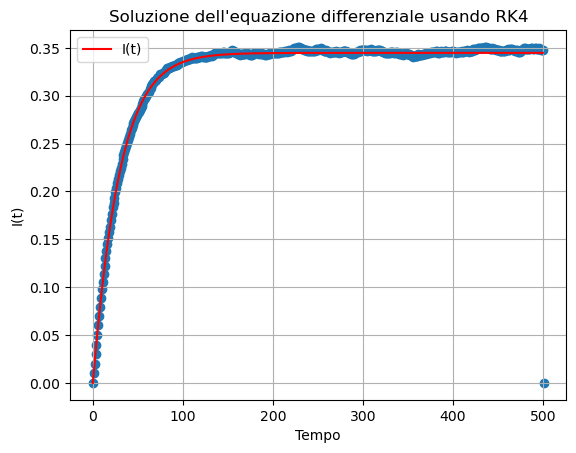

In [116]:

plt.scatter(assex,assey2)
plt.plot(t, I, label='I(t)', color = 'r')
plt.xlabel('Tempo')
plt.ylabel('I(t)')
plt.title('Soluzione dell\'equazione differenziale usando RK4')
plt.legend()
plt.grid(True)
plt.show()

-2.324350166209228 0.3448118533845435 1.1483476364264407
[0.0, 2.589329861635292e-10, 5.095651678388435e-10, 7.51715578672929e-10, 9.852338944682515e-10, 1.209998434781312e-09, 1.4259168290564617e-09, 1.6329231300460378e-09, 1.8309789240333885e-09, 2.0200700001637983e-09, 2.2002071276006063e-09, 2.3714225028115266e-09, 2.5337709708139755e-09, 2.6873272496175105e-09, 2.83218415386699e-09, 2.9684525948425744e-09, 3.096259248991373e-09, 3.2157455587267236e-09, 3.327066178115956e-09, 3.4303886398134864e-09, 3.5258902464363473e-09, 3.6137586256757004e-09, 3.6941896208730896e-09, 3.7673864583531724e-09, 3.83355835964494e-09, 3.892920041881354e-09, 3.945690218998266e-09, 3.992090602533693e-09, 4.0323456240720645e-09, 4.0666809364431344e-09, 4.09532319167738e-09, 4.118498708738372e-09, 4.136433362500469e-09, 4.149351917615007e-09, 4.157476918287273e-09, 4.1610285772542e-09, 4.160224387206313e-09, 4.155278732209666e-09, 4.146402055038578e-09, 4.133800746153327e-09, 4.117677310233603e-09, 4.0982

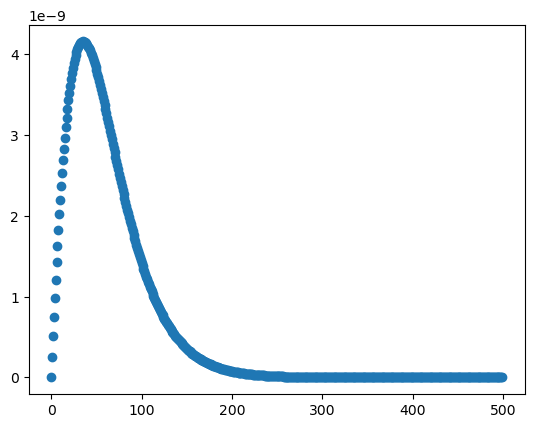

In [119]:

def find_zero_crossing(x, y):
    zero_crossings = []
    for i in range(1, len(y)):
        if y[i-1] * y[i] < 0:  # Controlla se y cambia segno
            # Interpolazione lineare per trovare x dove y=0
            x0 = x[i-1]
            x1 = x[i]
            y0 = y[i-1]
            y1 = y[i]
            x_zero = x0 - y0 * (x1 - x0) / (y1 - y0)
            zero_crossings.append(x_zero)
    return zero_crossings

#J, I_inf = find_zero_crossing(I_values,dIdt_values)


A = (I_inf - J)/(I0-J)

print(J,I_inf,A)
confronto = []

left = []
right = []

for i in range(0, len(t)-1):
    conf = (I[i] - I_inf)/(I0 - I_inf) - (A)/(np.exp(phi_opt*i) + A -1)
    confronto.append(conf)
    left.append((A)/(np.exp(phi_opt*t[i]) + A -1))
    right.append((I[i] - I_inf)/(I0 - I_inf))



print(confronto)
plt.scatter(t[:-1], confronto)
plt.show()

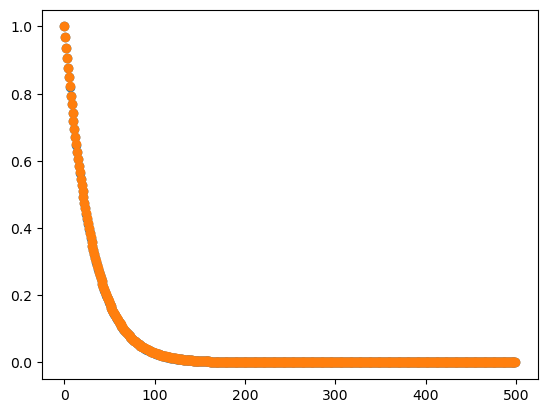

In [120]:
plt.scatter(t[:-1], left)
plt.scatter(t[:-1], right)
plt.show()